<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Variante" data-toc-modified-id="1.-Variante-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Variante</a></span><ul class="toc-item"><li><span><a href="#Anwendung-des-BBC-News-Datensatz" data-toc-modified-id="Anwendung-des-BBC-News-Datensatz-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anwendung des BBC News Datensatz</a></span></li></ul></li><li><span><a href="#2.-Variante-(Towards-Science)" data-toc-modified-id="2.-Variante-(Towards-Science)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Variante (Towards Science)</a></span><ul class="toc-item"><li><span><a href="#Anwendung-des-BBC-News-Datensatzes" data-toc-modified-id="Anwendung-des-BBC-News-Datensatzes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Anwendung des BBC News Datensatzes</a></span></li></ul></li><li><span><a href="#3.-Variante-Sklearn" data-toc-modified-id="3.-Variante-Sklearn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Variante Sklearn</a></span><ul class="toc-item"><li><span><a href="#Ellbow-Methode" data-toc-modified-id="Ellbow-Methode-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ellbow-Methode</a></span></li></ul></li><li><span><a href="#Die-häufigsten-Wörter-pro-Cluster" data-toc-modified-id="Die-häufigsten-Wörter-pro-Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Die häufigsten Wörter pro Cluster</a></span></li><li><span><a href="#KMeans-(TSNE)" data-toc-modified-id="KMeans-(TSNE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>KMeans (TSNE)</a></span><ul class="toc-item"><li><span><a href="#Silhouetten-Koeffizient" data-toc-modified-id="Silhouetten-Koeffizient-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Silhouetten Koeffizient</a></span></li></ul></li><li><span><a href="#K-Means-mit-Umap" data-toc-modified-id="K-Means-mit-Umap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>K-Means mit Umap</a></span></li><li><span><a href="#KMeans-Visualisierung-pro-Iteration" data-toc-modified-id="KMeans-Visualisierung-pro-Iteration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>KMeans Visualisierung pro Iteration</a></span></li></ul></div>

# 1. Variante

https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python

In [2]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

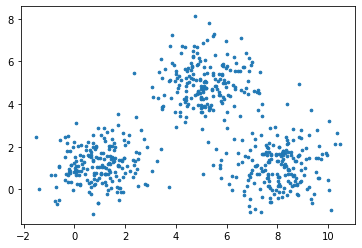

In [3]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

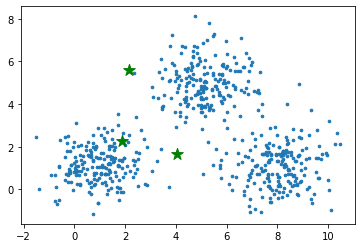

In [4]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.median(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [5]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.median(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new  

array([[4.86987683, 5.47393084],
       [7.57905178, 1.62461559],
       [0.941308  , 1.11183874]])

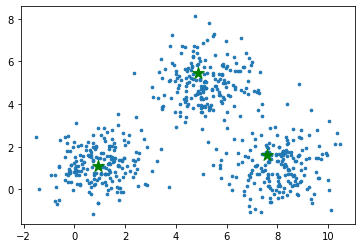

In [6]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

## Anwendung des BBC News Datensatz

In [7]:
df = pd.read_csv("BBC/news_POS_POS_tags_nouns_adjectives_verb.csv")

In [9]:
df.head(5)

,Unnamed: 0,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0


In [10]:
df = df.drop(columns="Unnamed: 0")

In [11]:
df.head(5)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0


In [12]:
df.shape

(2225, 12)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

data = df['content']
tf_idf_vectorizor = TfidfVectorizer(
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
sklearn_pca = PCA(n_components = 3)
data= sklearn_pca.fit_transform(tf_idf_array)

In [15]:
data

array([[-0.07938727, -0.13787413, -0.00077778],
       [ 0.0489361 , -0.14160622, -0.06666283],
       [-0.05817465, -0.10018372, -0.06574753],
       ...,
       [ 0.1668959 , -0.06228754,  0.17070416],
       [-0.00673539, -0.03454808, -0.00318918],
       [ 0.16055103,  0.0723917 ,  0.28928326]])

In [16]:
# Number of clusters
K = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(K,c)*std + mean

In [17]:
c

3

In [18]:
centers

array([[ 0.17362649,  0.05309606,  0.0322875 ],
       [ 0.04419173,  0.04625935, -0.04948866],
       [ 0.18717408,  0.1597403 ,  0.05870157]])

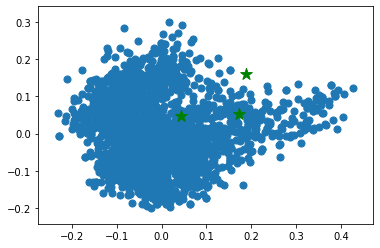

In [19]:
# Plot the data and the centers generated as random
#plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [20]:
from copy import deepcopy

K = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

In [21]:
c

3

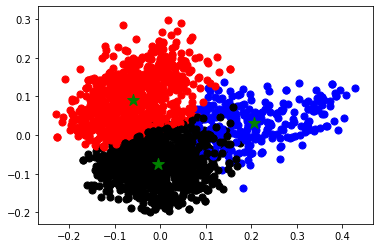

In [25]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis= 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
    # Assign all training data to closest center
    cluster_labels = np.argmin(distances, axis = 1)
    
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(data[cluster_labels == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['red', 'blue', 'black']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=50, c = colors[cluster_labels[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [26]:
cluster_labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [27]:
centers_new

array([[-0.06082879,  0.09107176, -0.00148833],
       [ 0.20627292,  0.03092693, -0.08709094],
       [-0.00589872, -0.07542291,  0.02270456]])

# 2. Variante (Towards Science)

https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [28]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

## Anwendung des BBC News Datensatzes

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


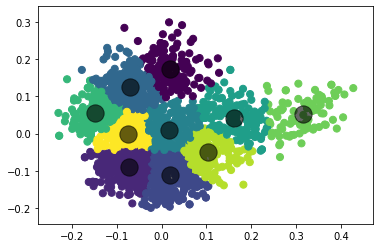

In [31]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(10, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [32]:
predicted_values

array([1, 2, 1, ..., 8, 4, 5], dtype=int64)

# 3. Variante Sklearn 

In [33]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

Text(0.5, 1.0, 'PCA')

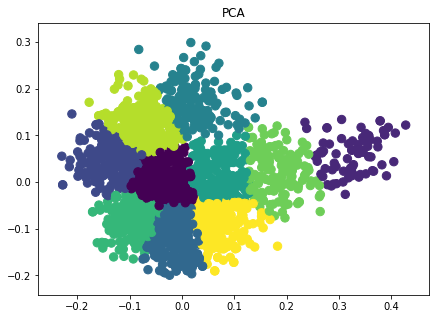

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('PCA')
#plt.savefig('K_Means/PCA_K-Means_Lyrics.png', bbox_inches = "tight")

## Ellbow-Methode

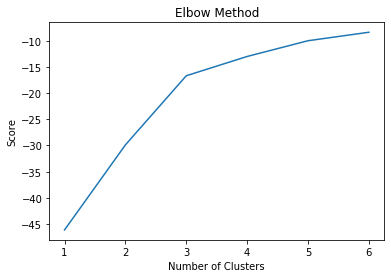

In [35]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
#plt.savefig('../../images/K-Means/Images_HA/Ganzer Datensatz/EM_1', bbox_inches = "tight")
plt.show()

# Die häufigsten Wörter pro Cluster

In [36]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

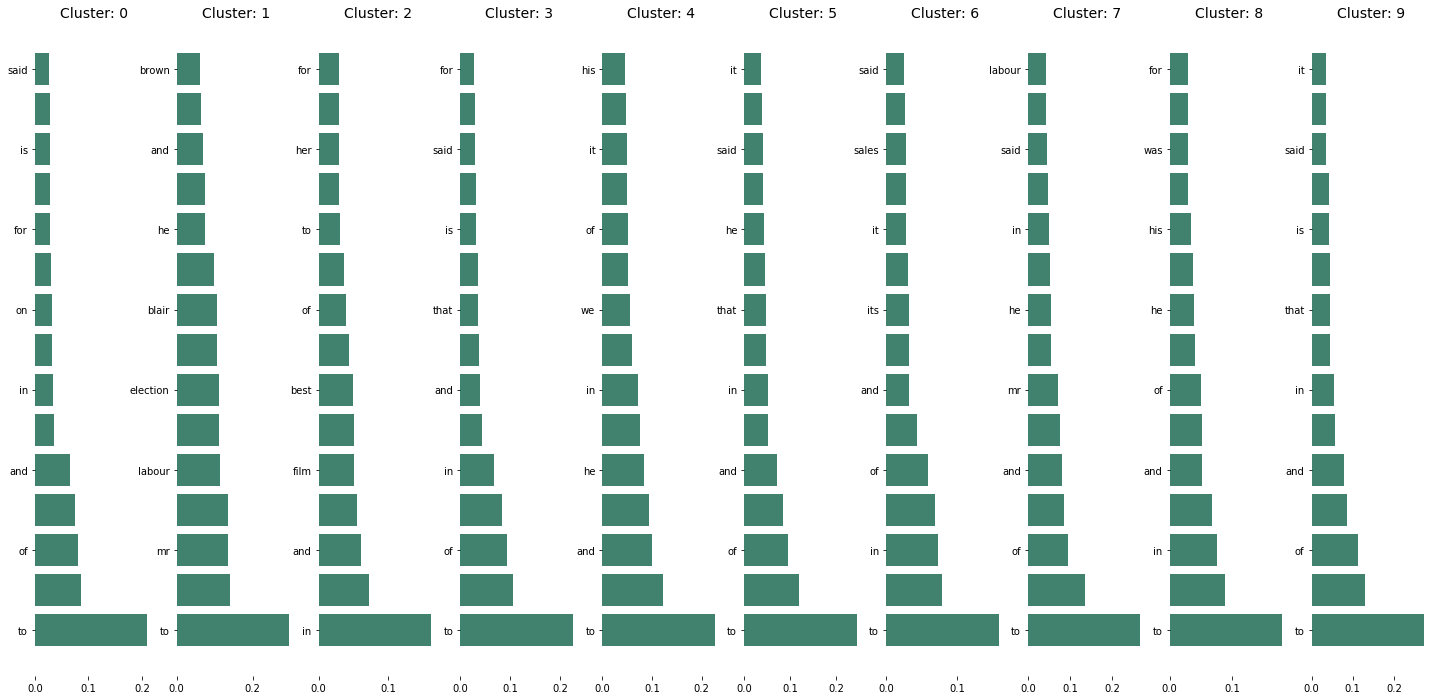

In [37]:
def plot_features(dfs):
    fig = plt.figure(figsize=(25,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        #ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
        #plt.savefig('K_Means/Lyrics_Cluster.png', bbox_inches = "tight")
    plt.show();
    
plot_features(dfs)

In [38]:
data = df['POS']
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [39]:
data

0       high fourth own fourth underlying exceptional ...
1       late recent sanguine current current next shar...
2       Russian former similar foreign Legal such real...
3       high pre - tax chief respectable third full la...
4       French last major global top other Last LVMH b...
                              ...                        
2220    rogue net net able free pre - approved rogue p...
2221    organised personal alert Many online true legi...
2222    new European legal former Dutch controversial ...
2223    sure safe secure malicious other enough first ...
2224    Online last costly humorous good worrying popu...
Name: POS, Length: 2225, dtype: object

In [41]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

Text(0.5, 1.0, 'PCA')

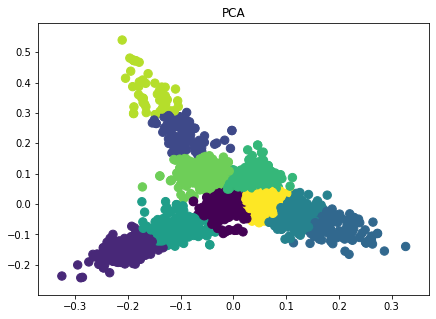

In [43]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('PCA')
#plt.savefig('K_Means/PCA_K-Means_POS.png', bbox_inches = "tight")

In [44]:
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [45]:
dfs

[    features     score
 0        are  0.044499
 1       have  0.041865
 2       club  0.025989
 3       year  0.025938
 4       test  0.024865
 5      world  0.023078
 6       time  0.021029
 7        new  0.021017
 8      first  0.019054
 9       last  0.018589
 10  decision  0.018266
 11        do  0.017325
 12      game  0.016689
 13     greek  0.016471
 14       bid  0.015389,    features     score
 0      game  0.102491
 1     match  0.067308
 2     first  0.065949
 3      side  0.065166
 4      half  0.063646
 5      team  0.056630
 6      have  0.054997
 7     final  0.054864
 8       win  0.053277
 9    second  0.053195
 10  victory  0.049053
 11    coach  0.048884
 12   injury  0.047295
 13     good  0.045431
 14     goal  0.044435,     features     score
 0       film  0.203323
 1      actor  0.056264
 2      award  0.055678
 3     comedy  0.055220
 4   festival  0.054741
 5      movie  0.050657
 6    musical  0.045120
 7         tv  0.040357
 8       show  0.039737
 9   dir

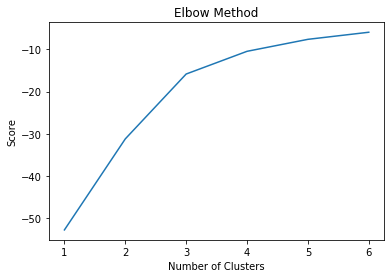

In [46]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
#plt.savefig('../../images/K-Means/Images_HA/Ganzer Datensatz/EM_2.png', bbox_inches = "tight")
plt.show()

# KMeans (TSNE)

In [47]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
data = TfidfVectorizer().fit_transform(df.POS.values.astype(str))

In [48]:
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(data)

In [49]:
perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.006s...
[t-SNE] Computed neighbors for 2225 samples in 0.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.060777
[t-SNE] Computed conditional probabilities in 0.280s
[t-SNE] Iteration 50: error = 73.8312531, gradient norm = 0.0000410 (50 iterations in 1.304s)
[t-SNE] Iteration 100: error = 64.2034149, gradient norm = 0.0037151 (50 iterations in 1.507s)
[t-SNE] Iteration 150: error = 62.2972794, gradient norm = 0.0005576 (50 iterations in 1.190s)
[t-SNE] Iteration 200: error = 62.1434822, gradient norm = 0.0003469 (50 iterations in 1.144s)
[t-SNE] Iteration 250: error = 62.1316986, gradient norm = 0.0002739 (50 iterations in 1.157s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.131699
[t-SNE] Iteration 300: err

In [50]:
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_embedded)
prediction = kmeans.predict(X_embedded)
prediction

array([0, 7, 0, ..., 9, 9, 3])

Text(0.5, 1.0, 'TSNE')

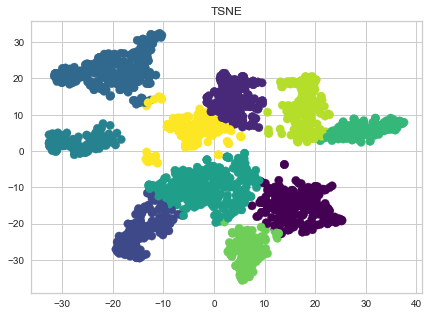

In [51]:
plt.figure(figsize=(7,5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=prediction, s=70, cmap='viridis')

plt.title('TSNE')
#plt.savefig('K_Means/TSNE_K-Means_POS.png', bbox_inches = "tight")

Text(0.5, 1.0, 'TSNE')

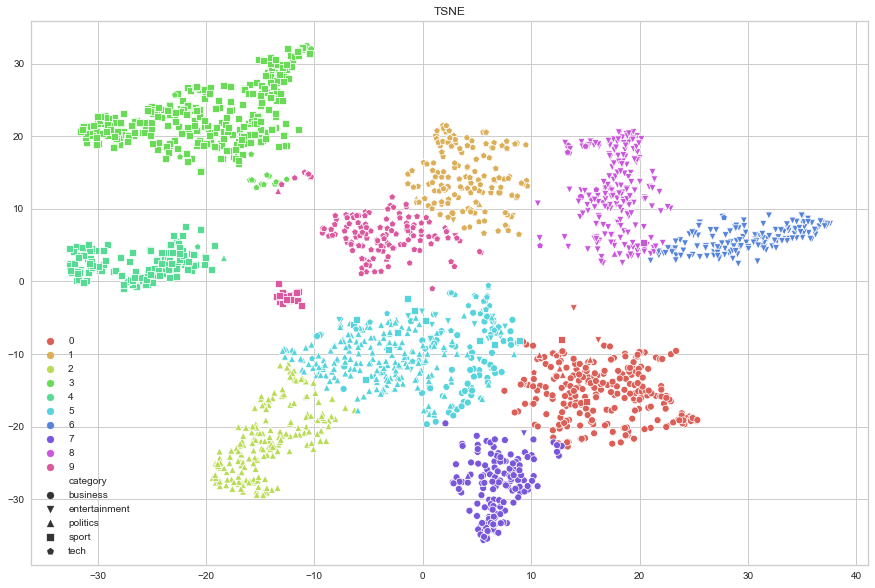

In [53]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=prediction, style=df.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

plt.title('TSNE')
#plt.savefig('../../images/K-Means/Images_HA/Ganzer Datensatz/kmeans_tsne_genremarkers_new.png', bbox_inches = "tight")

In [55]:
data = TfidfVectorizer().fit_transform(df.content)
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(data)
perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.002s...
[t-SNE] Computed neighbors for 2225 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.063108
[t-SNE] Computed conditional probabilities in 0.270s
[t-SNE] Iteration 50: error = 73.8381805, gradient norm = 0.0000260 (50 iterations in 1.307s)
[t-SNE] Iteration 100: error = 67.3587723, gradient norm = 0.0020606 (50 iterations in 1.122s)
[t-SNE] Iteration 150: error = 66.5433273, gradient norm = 0.0004059 (50 iterations in 1.107s)
[t-SNE] Iteration 200: error = 66.4781799, gradient norm = 0.0001215 (50 iterations in 1.076s)
[t-SNE] Iteration 250: error = 66.4659271, gradient norm = 0.0000484 (50 iterations in 1.085s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.465927
[t-SNE] Iteration 300: err

In [56]:
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_embedded)
prediction = kmeans.predict(X_embedded)

Text(0.5, 1.0, 'TSNE')

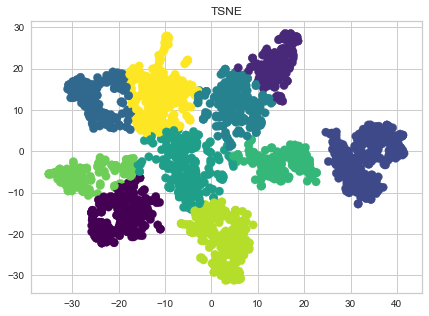

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('TSNE')
#plt.savefig('K_Means/TSNE_K-Means_Lyrics.png', bbox_inches = "tight")

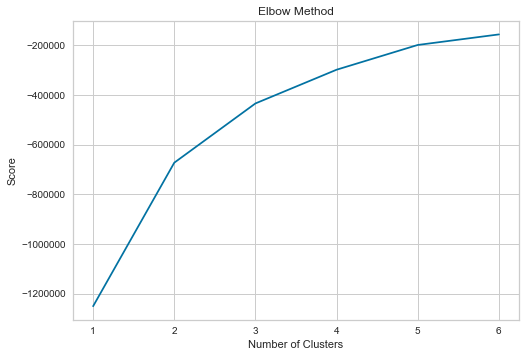

In [59]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X_embedded).score(X_embedded) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
#plt.savefig('../../images/K-Means/Images_HA/Ganzer Datensatz/EM_3', bbox_inches = "tight")
plt.show()

## Silhouetten Koeffizient

In [60]:
from sklearn.metrics import silhouette_score
metric_silhouette = []
for n in range(1, 7):
    model = KMeans(n_clusters=n)
    model.fit(data)
    if n > 1:  #silhouette_score needs at least 2 cluster to work
        metric_silhouette.append(silhouette_score(data, model.labels_))

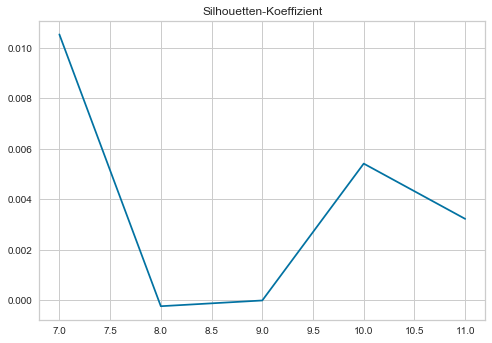

In [61]:
plt.title('Silhouetten-Koeffizient')
plt.plot(range(7, 12), metric_silhouette);
#plt.savefig('../../images/K-Means/Images_HA/Ganzer Datensatz/SK_8_12', bbox_inches = "tight")

 Optimaler Wert für k = 10?

# K-Means mit Umap

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer
import umap
import sklearn.cluster as cluster

In [64]:
tfidf = TfidfVectorizer()
data = df[:100]
docs = tfidf.fit_transform(df.content)

kmeans_labels = cluster.KMeans(n_clusters=10, max_iter=600, algorithm='auto').fit_predict(docs)

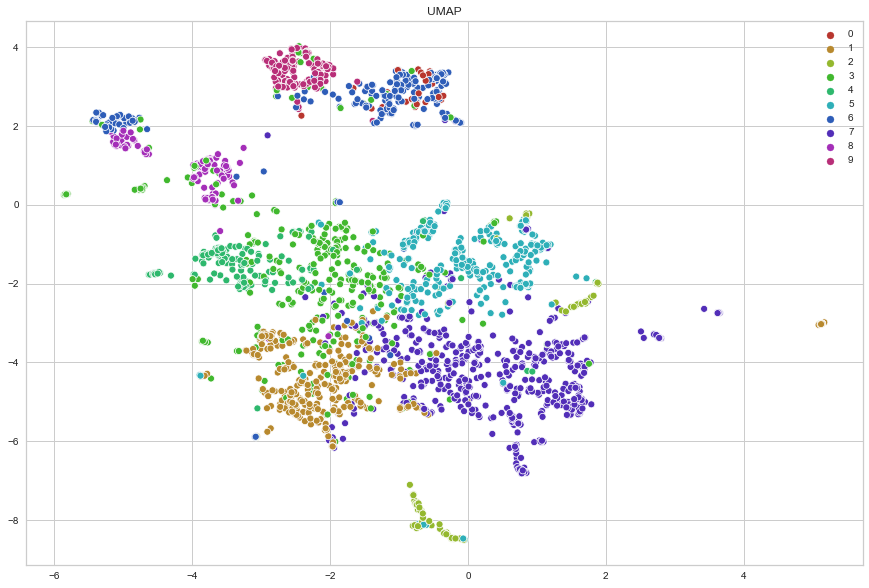

In [65]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(docs)

plt.figure(figsize=(15,10))
sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1], hue=kmeans_labels, palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)), l=0.45, s=.6))
plt.title('UMAP')
plt.legend()
#plt.savefig('UMAP_kmeans_stemmed.png')
plt.show()

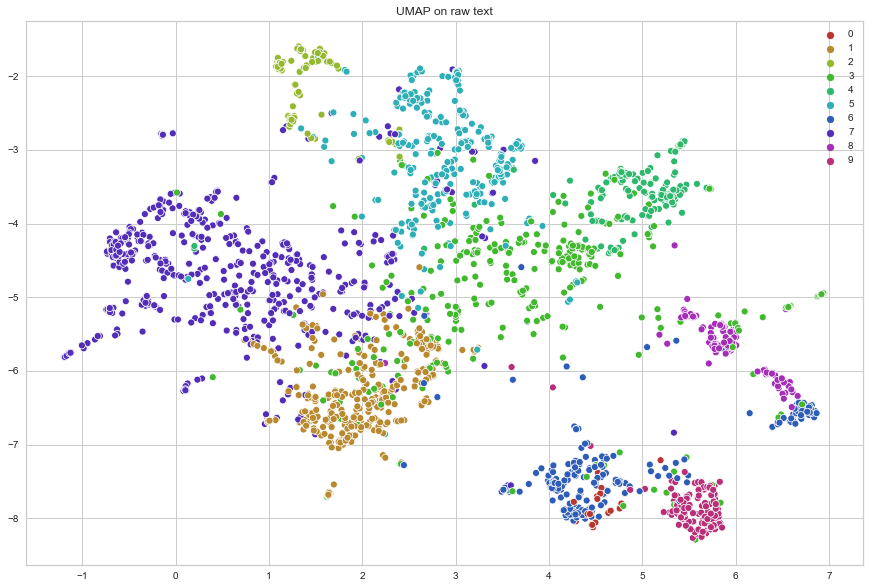

In [66]:
# tune parameters
improved_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(docs)

plt.figure(figsize=(15,10))
sns.scatterplot(improved_embedding[:, 0], y=improved_embedding[:, 1], hue=kmeans_labels, palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)), l=0.45, s=.6))
plt.title('UMAP on raw text')
plt.legend()
#plt.savefig('improved_UMAP_kmeans_text.png')
plt.show()

# KMeans Visualisierung pro Iteration

In [67]:
data = df[:1000]
data

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,politics,100.txt,Guantanamo man 'suing government',A British terror suspect held in Guantanamo B...,611.0,326.0,A british terror suspect held in guantanamo b...,"['_SP', 'DT', 'JJ', 'NN', 'NN', 'VBN', 'IN', '...",British key informed dual British Zambian Brit...,66.0,32.0,4.0
996,politics,101.txt,Council tax rise 'reasonable',"Welsh councils should set their taxes at ""rea...",571.0,307.0,welsh council should set their tax at `` reas...,"['_SP', 'NNP', 'NNS', 'MD', 'VB', 'PRP$', 'NNS...",reasonable average good local full steep local...,93.0,44.0,14.0
997,politics,102.txt,Blunkett row should end - Blair,Prime Minister Tony Blair said it was time to...,468.0,263.0,prime minist toni blair said it wa time to dr...,"['_SP', 'NNP', 'NNP', 'NNP', 'NNP', 'VBD', 'PR...",second indefinite intact special poor departme...,84.0,22.0,7.0
998,politics,103.txt,Minimum rate for foster parents,Foster carers are to be guaranteed a minimum ...,364.0,230.0,foster carer are to be guarante a minimum all...,"['_SP', 'JJ', 'NNS', 'VBP', 'TO', 'VB', 'VBN',...",Foster minimum other new fair possible local c...,42.0,38.0,12.0


In [68]:
def tsne(data):
    X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(data)
    perplexity = [50]
    for p in perplexity:
        X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=False, random_state=42).fit_transform(X_reduced)
    return X_embedded

def visualise_tsne(data, prediction, i, sample, inertia_end):
    X_embedded = tsne(data)
    plt.figure(figsize=(15,10))
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=prediction, marker="o", palette=sns.hls_palette(n_colors=len(np.unique(prediction)), l=0.45, s=.6))

    plt.title('TSNE at iteration ' + str(i) + ', Inertia: ' + str(inertia_end))
    plt.legend()
    #plt.savefig(str(sample) + '_' + str(i) + '_clusters_per_iteration.png')
    plt.show()
    plt.cla()

In [69]:
new_centroids = 3
cluster = 10
iteration = 15 # voller KMeans konvergiert bei ca. 15 Iterationen

text = TfidfVectorizer().fit_transform(df.POS.values.astype(str))

New centroid:  0
Iteration:  0
Inertia: 2053.436495134783


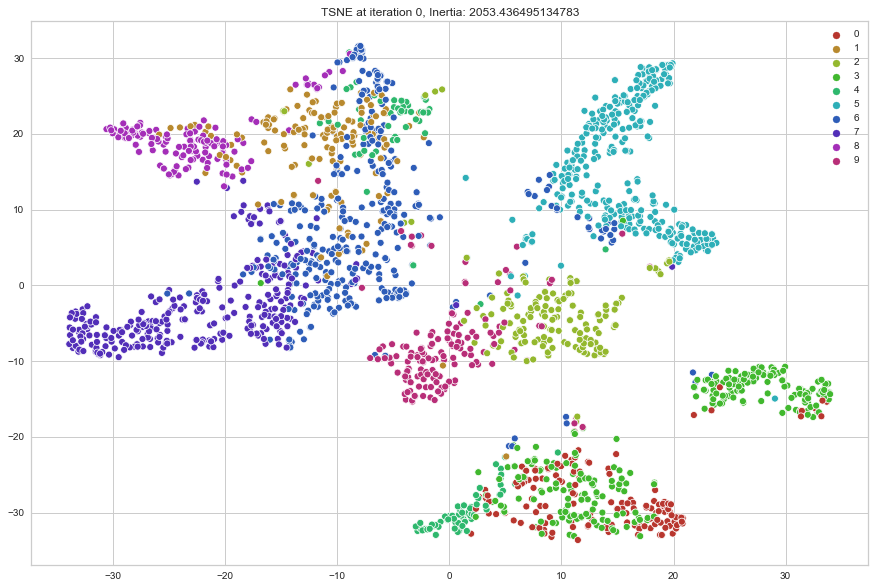

Iteration:  1
Inertia: 2047.0945009242216


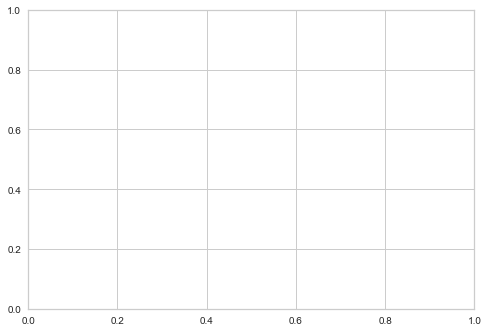

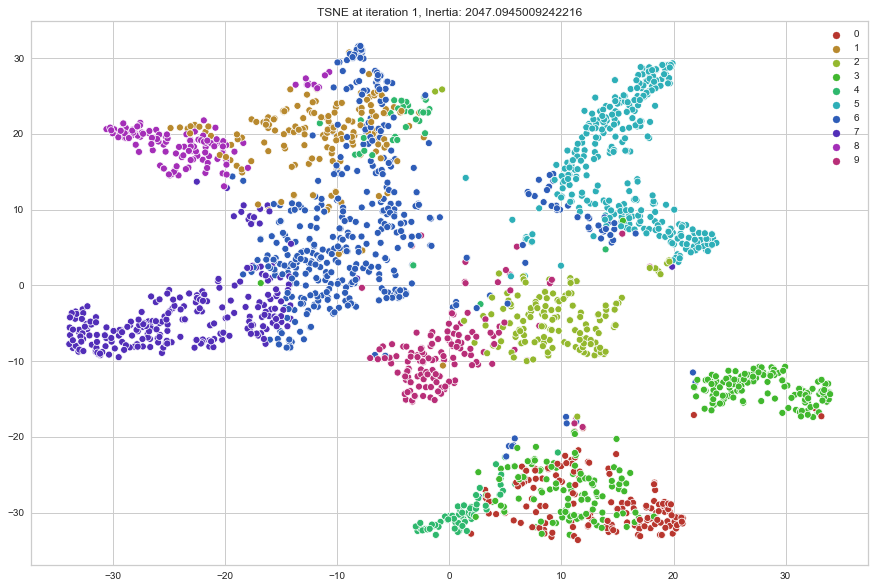

Iteration:  2
Inertia: 2044.0109584021814


ValueError: array must not contain infs or NaNs

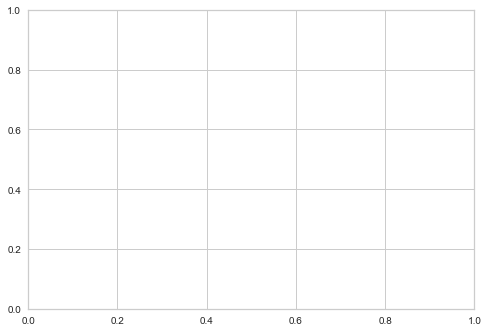

In [72]:
final_centroids = []
final_inertia = []
    
for c in range(new_centroids):
    print('New centroid: ', c)
    km = KMeans(n_clusters=cluster, max_iter=1, n_init=1) 
    km.fit(text)
    inertia_start = km.inertia_
    cents = km.cluster_centers_
        
    for i in range(iteration):
        km = KMeans(n_clusters=cluster, init=cents, max_iter=1, n_init=1)
        km.fit(text)
        print('Iteration: ', i)
        print('Inertia:', km.inertia_)
        #print('Centroids:', km.cluster_centers_)
        inertia_end = km.inertia_
        cents = km.cluster_centers_
        prediction = km.predict(text)
        visualise_tsne(text, prediction, i, c, inertia_end)
        
    final_centroids.append(cents)
    final_inertia.append(inertia_end)
    print('Difference between initial and final inertia: ', inertia_start-inertia_end)